In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 12, 9  # 设置figure_size尺寸
plt.rcParams['font.sans-serif'] = ['SimHei']  # 图表可输出中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
def save_variable(v,filename):
    f=open(filename,'wb')
    pickle.dump(v,f)
    f.close()
    return filename
def load_variavle(filename):
   f=open(filename,'rb')
   r=pickle.load(f)
   f.close()
   return r


In [4]:
train = pd.read_csv('比赛训练集.csv', encoding='gbk')
test = pd.read_csv('比赛测试集.csv', encoding='gbk')

In [5]:
train_label = train['患有糖尿病标识']

### 将文本转化为数值型

In [6]:
def FHOD(a):
    if a=='无记录':
        return 0
    elif a=='叔叔或者姑姑有一方患有糖尿病' or a=='叔叔或姑姑有一方患有糖尿病':
        return 1
    else:
        return 2
    
train['糖尿病家族史']=train['糖尿病家族史'].apply(FHOD)
test['糖尿病家族史']=test['糖尿病家族史'].apply(FHOD)

## 查看标签数据分布

In [7]:
train_label.value_counts()

患有糖尿病标识
0    3134
1    1936
Name: count, dtype: int64

##比赛数据分析

### .corr()计算字段之间的相关性
通过柱状图和热力图可以看出 体重指数	和 肱三头肌皮褶厚度与标签有较高的相关性

#### 绘制柱状图

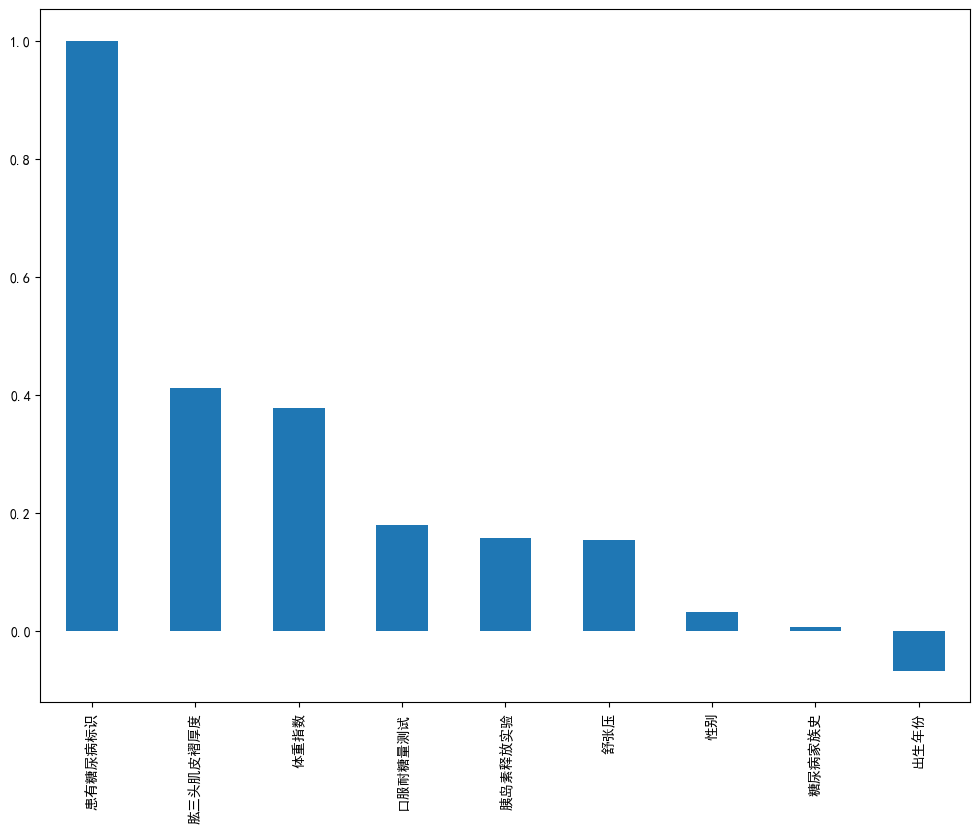

In [36]:
train.drop(columns='编号').corr()['患有糖尿病标识'].sort_values(ascending = False).plot(kind='bar')
plt.savefig('标签数据分布(备用)/患有糖尿病标识.jpg')

### 绘制热力图

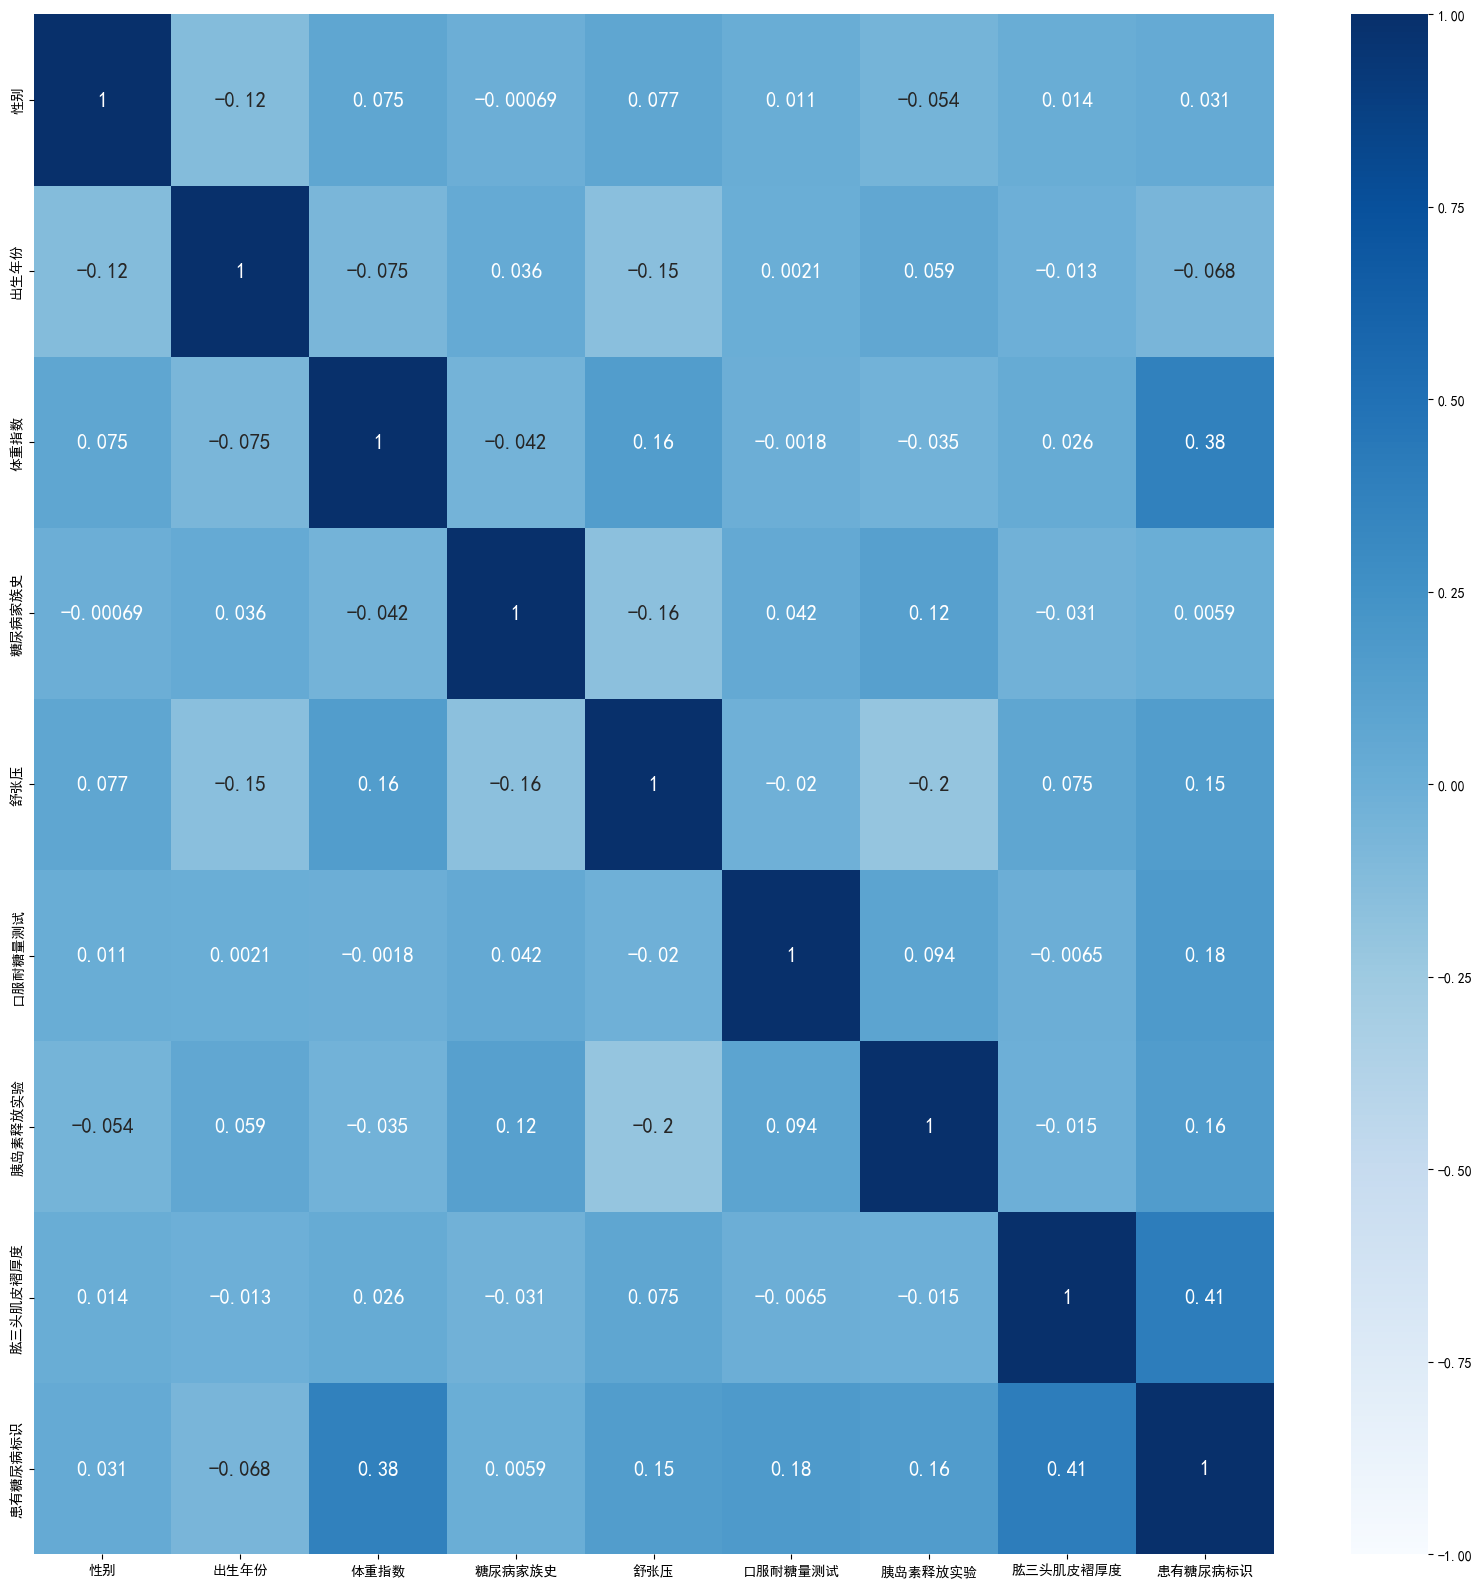

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(train.drop(columns='编号').corr(), annot=True, vmax=1, vmin=-1,cmap='Blues',annot_kws={'size':15})
plt.savefig('标签数据分布(备用)/热力图.jpg')
plt.show()

In [10]:
train

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,0,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,0,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,0,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,0,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,1,NaN,7.134,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
5065,5066,1,1992,36.4,2,95.0,3.102,0.00,0.0,0
5066,5067,1,1991,37.1,1,94.0,6.207,6.77,0.0,0
5067,5068,0,1975,25.4,0,90.0,7.343,0.00,0.0,0
5068,5069,0,1972,28.5,2,101.0,6.268,8.99,0.0,0


### 查看类别特征的标签占比
两种类别特征在占比上无明显区别

In [11]:
type_columns = ['性别','糖尿病家族史']

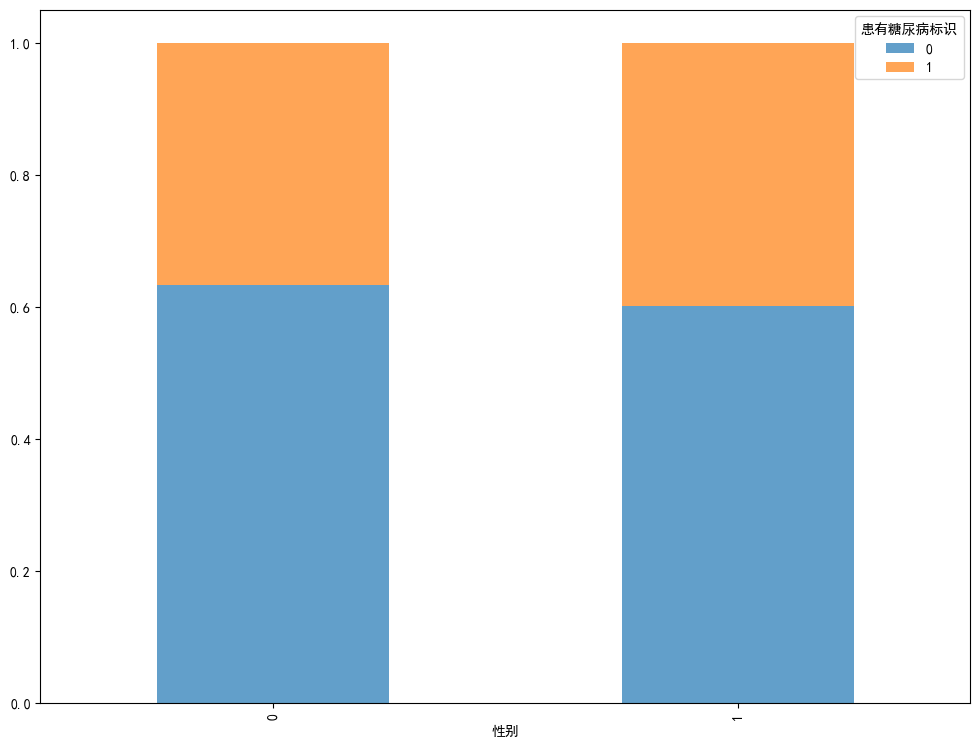

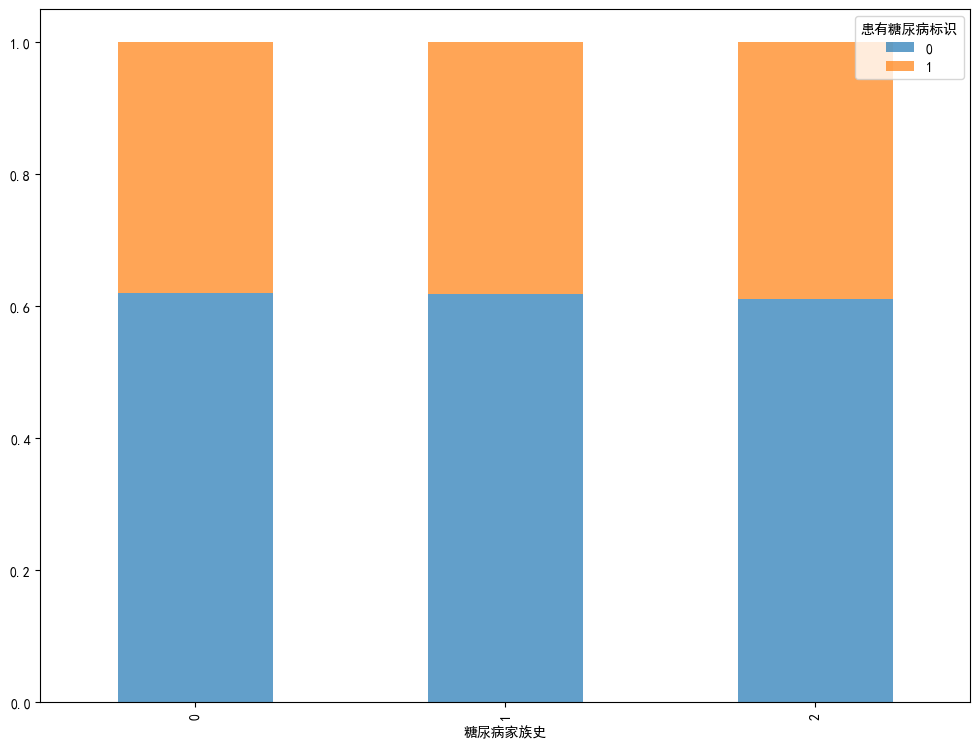

In [38]:
for var in type_columns:
    showing_prop=train.groupby(var)['患有糖尿病标识'].value_counts(normalize=True).unstack('患有糖尿病标识').sort_values(by=train['患有糖尿病标识'].unique()[0],ascending=False)
    showing_prop.plot(kind='bar', stacked=True,alpha=0.7)
    plt.savefig('标签数据分布(备用)/患有糖尿病标识{}.jpg'.format(var))
    plt.show()

### 不同性别数量
女性患者数量多余男性

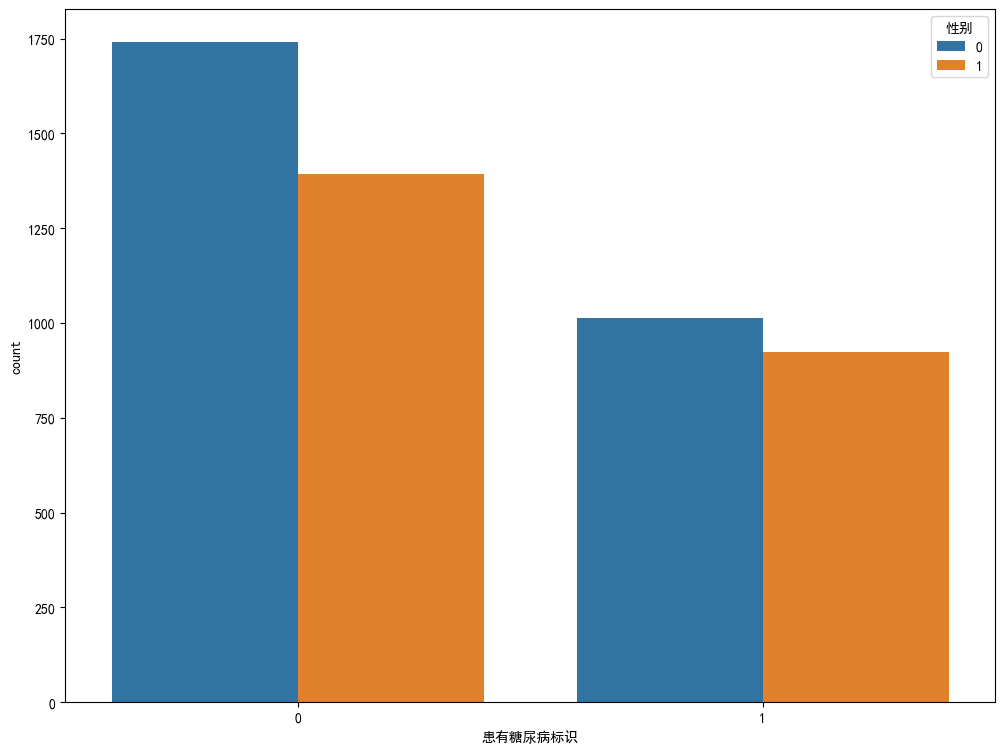

In [39]:
sns.countplot(x='患有糖尿病标识', hue='性别', data=train)
plt.savefig('标签数据分布(备用)/不同性别的患病数量.jpg')

### 查看连续特征
胰岛素释放实验 和 肱三头肌皮褶厚度的有效值较少大部分为0
口服耐糖量测试的-1数量较多考虑不进行处理

In [41]:
num_columns = ['出生年份', '体重指数', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度']

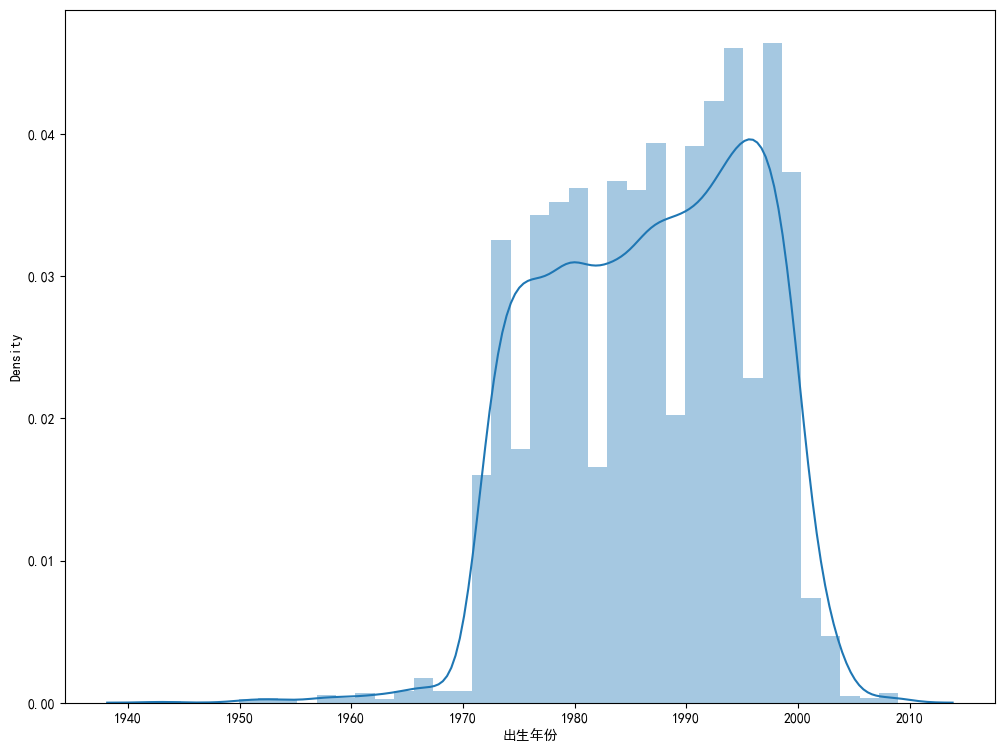

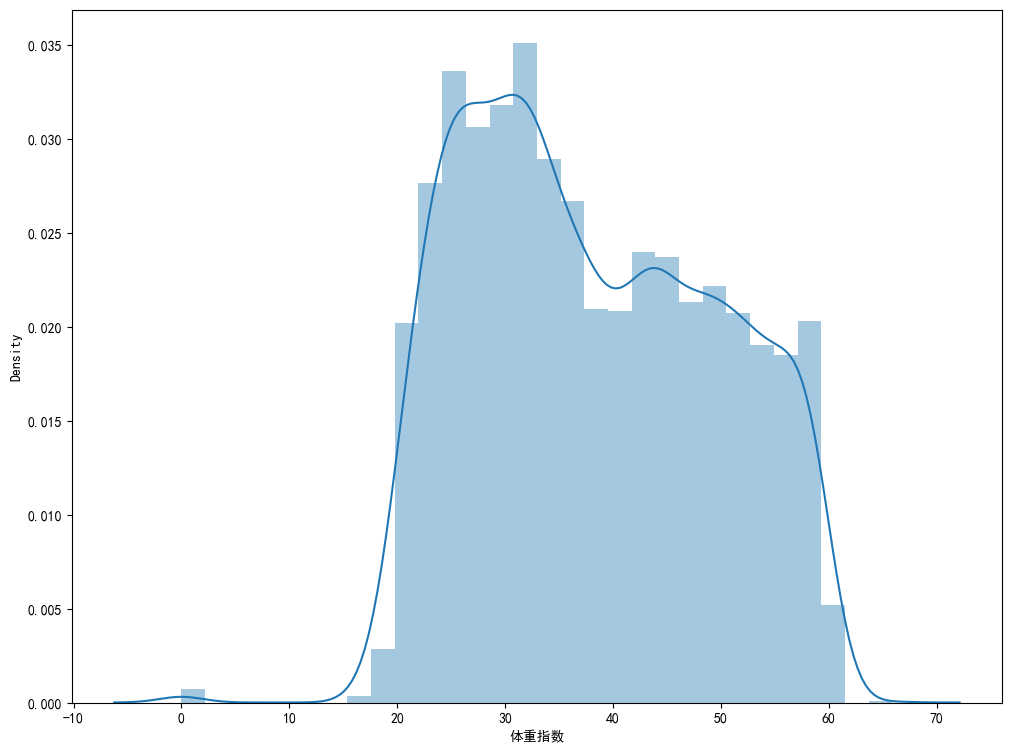

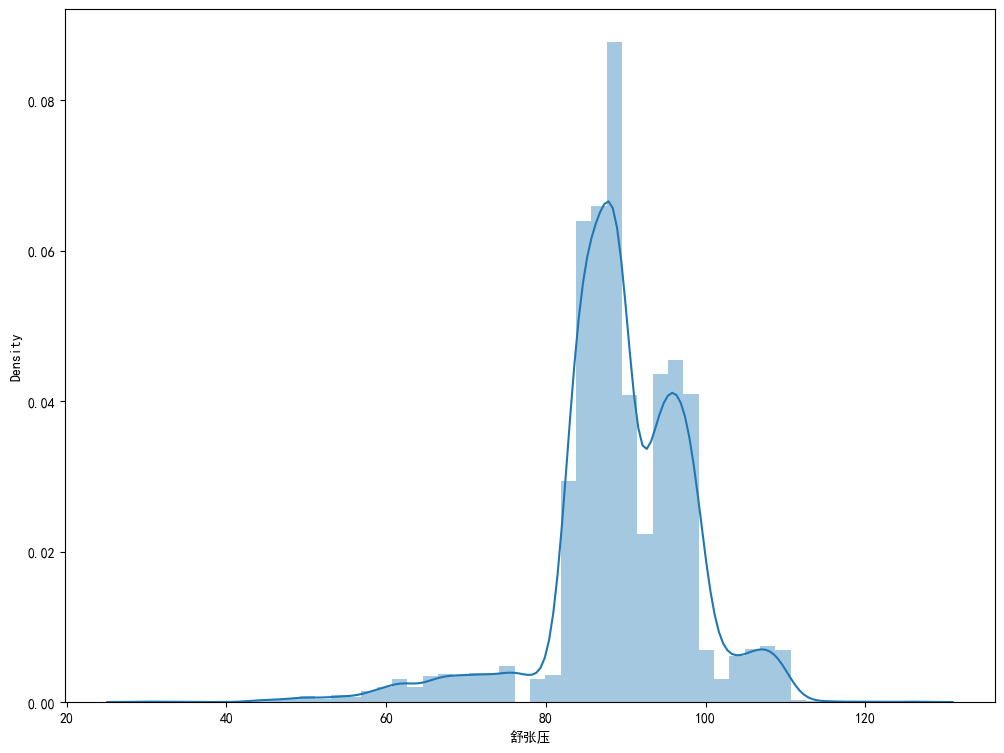

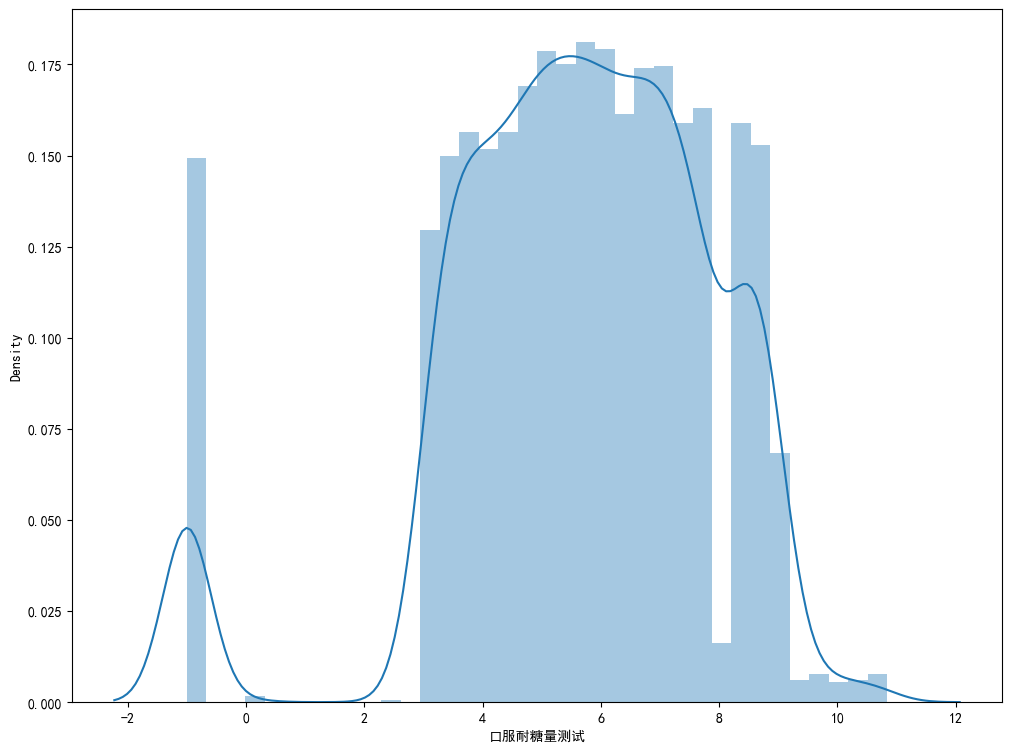

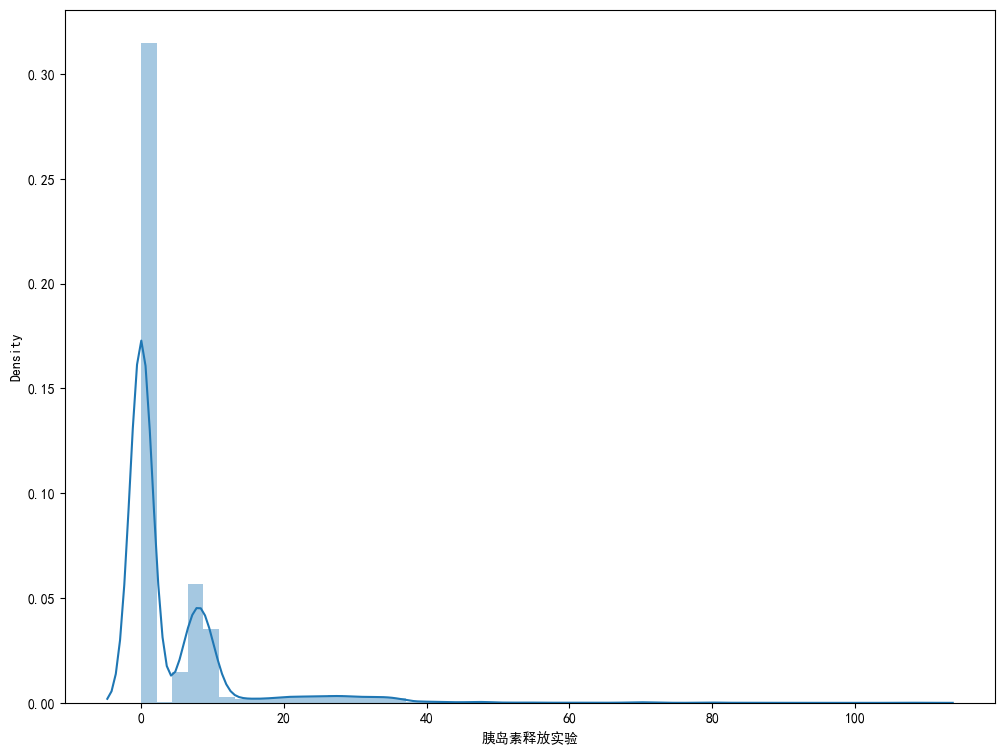

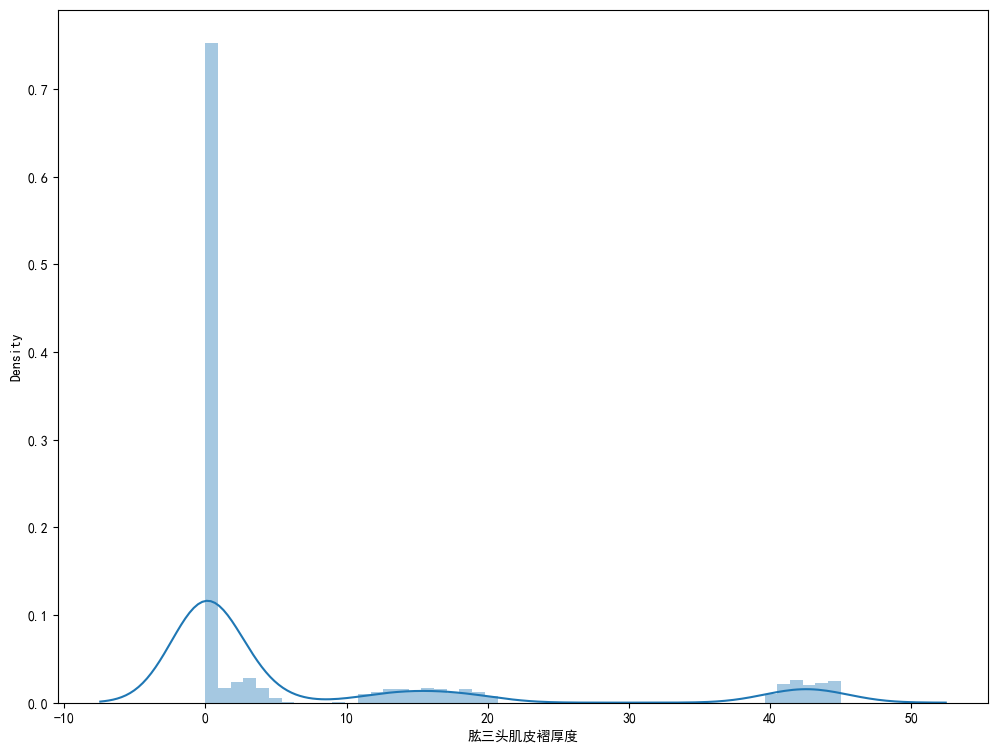

In [43]:
for i in num_columns:
    sns.distplot(train[i])
    plt.savefig('标签数据分布(备用)/{}.jpg'.format(i))
    plt.show()

### 缺失值计算

In [44]:
train.isnull().mean(0)

编号          0.0
性别          0.0
出生年份        0.0
体重指数        0.0
糖尿病家族史      0.0
舒张压         0.0
口服耐糖量测试     0.0
胰岛素释放实验     0.0
肱三头肌皮褶厚度    0.0
患有糖尿病标识     0.0
dtype: float64

In [45]:
test.isnull().mean(0)

编号          0.0
性别          0.0
出生年份        0.0
体重指数        0.0
糖尿病家族史      0.0
舒张压         0.0
口服耐糖量测试     0.0
胰岛素释放实验     0.0
肱三头肌皮褶厚度    0.0
dtype: float64

In [46]:
train['舒张压'].mean()

89.40295857988166

In [47]:
test['舒张压'].mean()

89.607

### 均值填充

In [48]:
train['舒张压']=train['舒张压'].fillna(89)
test['舒张压']=test['舒张压'].fillna(89)

# 逻辑回归尝试

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
scaler.fit(train.drop(columns=['编号','患有糖尿病标识']))
X = scaler.transform(train.drop(columns=['编号','患有糖尿病标识']))

In [51]:
y = train['患有糖尿病标识']

In [52]:
lg_model = LogisticRegression()

In [53]:
lg_model.fit(X,y)

LogisticRegression()

In [54]:
x_test = scaler.transform(test.drop(columns='编号'))

In [55]:
pre = lg_model.predict(x_test)

In [57]:
pre_y=pd.DataFrame(pre)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('暂存数据(备用)/逻辑回归.csv',index=False)


![Image Name](https://cdn.kesci.com/upload/image/reh7w9jlgm.jpg?imageView2/0/w/960/h/960)


# 特征工程
1.分箱
2.年份转换

In [58]:
"""
人体的成人体重指数正常值是在18.5-24之间
低于18.5是体重指数过轻
在24-27之间是体重超重
27以上考虑是肥胖
高于32了就是非常的肥胖。
"""
def BMI(a):
    if a<18.5:
        return 0
    elif 18.5<=a<=24:
        return 1
    elif 24<a<=27:
        return 2
    elif 27<a<=32:
        return 3
    else:
        return 4
    
train['BMI']=train['体重指数'].apply(BMI)
test['BMI']=test['体重指数'].apply(BMI)

train['出生年份']=2022-train['出生年份']  #换成年龄
test['出生年份']=2022-test['出生年份'] 

def DBP(a):
    if a<60:
        return 0
    elif 60<=a<=90:
        return 1
    elif a>90:
        return 2
    else:
        return a
train['DBP']=train['舒张压'].apply(DBP)
test['DBP']=test['舒张压'].apply(DBP)

# 构造评价指标F1

In [171]:
from sklearn.metrics import f1_score, roc_auc_score
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', f1_score(y_true, y_hat) ,True

# lgb模型 + 交叉验证

In [172]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, KFold

In [173]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 5
    seed = 2022
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []
    f1_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        if clf_name == "lgb":
            train_matrix = clf.Dataset(trn_x, label=trn_y)
            valid_matrix = clf.Dataset(val_x, label=val_y)

            params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'min_child_weight': 5,
                'num_leaves': 2 ** 5,
                'lambda_l2': 10,
                'feature_fraction': 0.7,
                'bagging_fraction': 0.7,
                'bagging_freq': 10,
                'learning_rate': 0.2,
                'seed': 2022,
                'verbosity': -1,
                'device' : 'gpu',
                'gpu_platform_id' : 1,
                'gpu_device_id' : 1,
                'n_jobs':-1,
            }

            # model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], 
            #                   feval=lgb_f1_score,
            #                   categorical_feature=[], verbose_eval=3000, early_stopping_rounds=200)
            # model = clf.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix], 
            #                   feval=lgb_f1_score,
            #                   categorical_feature=[])
             # 50000的运算量巨大
            model = clf.train(params, train_matrix, 500, valid_sets=[train_matrix, valid_matrix], 
                              feval=lgb_f1_score,
                              categorical_feature=[])
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)
            
#             print(list(sorted(zip(features, model.feature_importance("gain")), key=lambda x: x[1], reverse=True))[:20])
                
        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            test_matrix = clf.DMatrix(test_x)
            
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.2,
                      'seed': 2020,
                      'nthread': 36,
                      "silent": True,
                      }
            
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            # model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=3000, early_stopping_rounds=200)
            model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist)
            # val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            # test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit)
            print(model)
            val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit)
                 
        if clf_name == "cat":
            params = {'learning_rate': 0.2, 'depth': 5, 'l2_leaf_reg': 10, 'bootstrap_type': 'Bernoulli',
                      'od_type': 'Iter', 'od_wait': 50, 'random_seed': 11, 'allow_writing_files': False}
            
            model = clf(iterations=20000, **params)
            model.fit(trn_x, trn_y, eval_set=(val_x, val_y),
                      cat_features=[], use_best_model=True, verbose=3000)
            
            val_pred  = model.predict(val_x)
            test_pred = model.predict(test_x)
            
        train[valid_index] = val_pred
        
        test += test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        f1_scores.append(f1_score(val_y, [1 if i > 0.5 else 0 for i in val_pred]))
        
        print(cv_scores)
        print(f1_scores)
       
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    
    print("%s f1_scotrainre_list:" % clf_name, f1_scores)
    print("%s f1_score_mean:" % clf_name, np.mean(f1_scores))
    print("%s f1_score_std:" % clf_name, np.std(f1_scores))
    return train, test

def lgb_model(x_train, y_train, x_test):
    lgb_train, lgb_test = cv_model(lgb, x_train, y_train, x_test, "lgb")
    return lgb_train, lgb_test

In [174]:
lgb_train, lgb_test = lgb_model(train.drop(['编号', '患有糖尿病标识'],axis=1), train_label, test.drop(['编号'],axis=1))

************************************ 1 ************************************
[0.9880267352185089]
[0.9483204134366926]
************************************ 2 ************************************
[0.9880267352185089, 0.9903056004752318]
[0.9483204134366926, 0.9390402075226978]
************************************ 3 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115]
[0.9483204134366926, 0.9390402075226978, 0.9282920469361147]
************************************ 4 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115, 0.9849542416452443]
[0.9483204134366926, 0.9390402075226978, 0.9282920469361147, 0.9317889317889319]
************************************ 5 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115, 0.9849542416452443, 0.9931988520223816]
[0.9483204134366926, 0.9390402075226978, 0.9282920469361147, 0.9317889317889319, 0.9517601043024773]
lgb_scotra

In [175]:
# lgb_train
# lgb_test
# 由于优化模型时间过长，所以保存过程变量，或机器学习的模型
# filename = save_variable(cv_scores,'process_variable(reserve)/cv_scores')
# filename = save_variable(np.mean(cv_scores),'process_variable(reserve)/mean_cv_scores')
# filename = save_variable(np.std(cv_scores),'process_variable(reserve)/std_cv_scores')
# filename = save_variable(f1_scores,'process_variable(reserve)/f1_scores')
# filename = save_variable(np.mean(f1_scores),'process_variable(reserve)/mean_f1_scores')
# filename = save_variable(np.std(f1_scores),'process_variable(reserve)/std_f1_scores')
filename = save_variable(lgb_train,'process_variable(reserve)/lgb_train')
filename = save_variable(lgb_test,'process_variable(reserve)/lgb_test')

In [176]:
# 读取过程变量，不再运行机器学习算法
# cv_scores = load_variavle('process_variable(reserve)/cv_scores')
# mean_cv_scores = load_variavle('mean_cv_scores')
# mean_cv_scores = load_variavle('mean_cv_scores')
# f1_scores = load_variavle('process_variable(reserve)/f1_scores')
# mean_f1_scores = load_variavle('mean_f1_scores')
# std_f1_scores = load_variavle('std_f1_scores')
lgb_train = load_variavle('process_variable(reserve)/lgb_train')
lgb_test = load_variavle('process_variable(reserve)/lgb_test')

In [177]:
pre_y=pd.DataFrame(lgb_test)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('暂存数据(备用)/baseline2.csv',index=False)


![Image Name](https://cdn.kesci.com/upload/image/reh7x07jgw.jpg?imageView2/0/w/960/h/960)


# 构造新特征
肱三头肌皮褶厚度女性正常在0.9*16.5 ，16.5 *1.2 男性正常在0.9*12.5， 12.5 *1.2
根据不同性别的肱三头肌皮褶厚度分箱

In [178]:
def TSF(sex, a):
    if a == 0:
        return -1
    else:
        if sex == 0:
            if a >= 16.5*1.2:
                return 0
            elif 0.9*16.5 < a < 16.5 *1.2:
                return 1
            elif 0.8*16.5 < a <=16.5*0.9:
                return 2
            elif 0.6*16.5 < a <= 0.8*16.5:
                return 3
            else:
                return 4
        if sex == 1:
            if a >= 12.5*1.2:
                return 0
            elif 0.9*12.5 < a < 12.5 *1.2:
                return 1
            elif 0.8*12.5 < a <=12.5*0.9:
                return 2
            elif 0.6*12.5 < a <= 0.8*12.5:
                return 3
            else:
                return 4

train['TSF']=train.apply(lambda x : TSF(x['性别'],x['肱三头肌皮褶厚度']), axis=1)
test['TSF']=test.apply(lambda x : TSF(x['性别'],x['肱三头肌皮褶厚度']), axis=1)

In [180]:
lgb_train, lgb_test = lgb_model(train.drop(['编号', '患有糖尿病标识'],axis=1), train_label, test.drop(['编号'],axis=1))

************************************ 1 ************************************
[0.9880267352185089]
[0.9483204134366926]
************************************ 2 ************************************
[0.9880267352185089, 0.9903056004752318]
[0.9483204134366926, 0.9404145077720207]
************************************ 3 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115]
[0.9483204134366926, 0.9404145077720207, 0.9282920469361147]
************************************ 4 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115, 0.9849542416452443]
[0.9483204134366926, 0.9404145077720207, 0.9282920469361147, 0.9317889317889319]
************************************ 5 ************************************
[0.9880267352185089, 0.9903056004752318, 0.9855470247147115, 0.9849542416452443, 0.9933351227468874]
[0.9483204134366926, 0.9404145077720207, 0.9282920469361147, 0.9317889317889319, 0.9505208333333333]
lgb_scotra

In [181]:
filename = save_variable(lgb_train,'process_variable(reserve)/lgb_train2')
filename = save_variable(lgb_test,'process_variable(reserve)/lgb_test2')

In [182]:
lgb_train = load_variavle('process_variable(reserve)/lgb_train2')
lgb_test = load_variavle('process_variable(reserve)/lgb_test2')

In [183]:
pre_y=pd.DataFrame(lgb_test)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('暂存数据(备用)/TSF.csv',index=False)


![Image Name](https://cdn.kesci.com/upload/image/reh7xhsqt9.jpg?imageView2/0/w/960/h/960)


# 自动特征衍生构造新的特征

In [184]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [185]:
data1=pd.read_csv('比赛训练集.csv',encoding='gbk')
data2=pd.read_csv('比赛测试集.csv',encoding='gbk')
#label标记为-1
data2['患有糖尿病标识']=-1
#训练集和测试机合并
data=pd.concat([data1,data2],axis=0,ignore_index=True)

    
data['BMI']=data['体重指数'].apply(BMI)
data['出生年份']=2022-data['出生年份']  #换成年龄
#糖尿病家族史

def FHOD(a):
    if a=='无记录':
        return 0
    elif a=='叔叔或者姑姑有一方患有糖尿病' or a=='叔叔或姑姑有一方患有糖尿病':
        return 1
    else:
        return 2
    
data['糖尿病家族史']=data['糖尿病家族史'].apply(FHOD)
data['舒张压']=data['舒张压'].fillna(-1)

def DBP(a):
    if a<60:
        return 0
    elif 60<=a<=90:
        return 1
    elif a>90:
        return 2
    else:
        return a
data['DBP']=data['舒张压'].apply(DBP)

### 类别特征自动衍生

In [186]:
def Binary_Cross_Combination(colNames,features, OneHot=True):
    colNames_new_l = []
    features_new_l = []
    
    features = features[colNames]
    
    for col_index, col_name in enumerate(colNames):
        for col_sub_index in range(col_index+1, len(colNames)):
            
            newNames = col_name + '&' + colNames[col_sub_index]
            colNames_new_l.append(newNames)
            
            new_df = pd.Series(features[col_name].astype('str')
                              + '&'
                              + features[colNames[col_sub_index]].astype('str'),
                              name=col_name)
            features_new_l.append(new_df)
    
    features_new = pd.concat(features_new_l,axis=1)
    features_new.columns = colNames_new_l
#     colNames_new = colNames_new_l
    
    
    if OneHot == True:
        enc = preprocessing.OneHotEncoder()
        enc.fit_transform(features_new)
        # features_new = pd.DataFrame(enc.fit_transform(features_new).toarray(), columns=enc.get_feature_names())
        # colNames_new = enc.get_feature_names()
        # AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names',使用get_feature_names_out()
        features_new = pd.DataFrame(enc.fit_transform(features_new).toarray(), columns=enc.get_feature_names_out())
        colNames_new = enc.get_feature_names_out()
    return features_new, colNames_new

### 连续特征自动衍生

In [187]:
def Binary_PolynomialFeatures(colNames, degree, features):
    colNames_new_l = []
    features_new_l = []
    
    features= features[colNames]
    
    for col_index, col_name in enumerate(colNames):
        for col_sub_index in range(col_index+1, len(colNames)):
            col_temp = [col_name] + [colNames[col_sub_index]]
            array_new_temp = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(features[col_temp])
            features_new_l.append(pd.DataFrame(array_new_temp[:,2:]))
            
            for deg in range(2,degree+1):
                for i in range(deg+1):
                    col_name_temp = col_temp[0]+ '**' + str(deg-i) + '*' + col_temp[1] + '**' + str(i)
                    colNames_new_l.append(col_name_temp)
    
    features_new = pd.concat(features_new_l,axis=1)
    features_new.columns= colNames_new_l
    colNames_new = colNames_new_l
    
    return features_new, colNames_new

In [188]:
colNames = ['性别','BMI','DBP', '糖尿病家族史']
features_new, colNames_new = Binary_Cross_Combination(colNames, data)
numeric_cols = ['体重指数','舒张压','口服耐糖量测试','胰岛素释放实验','肱三头肌皮褶厚度']
features_new2, colNames_new2 = Binary_PolynomialFeatures(colNames=numeric_cols,degree=3,features=data)

In [189]:
data_new = pd.concat([data, features_new, features_new2],axis=1)

# 筛选自动衍生的特征

### 卡方检验

In [190]:
from sklearn.feature_selection import VarianceThreshold

In [191]:
var_sel = VarianceThreshold()
var_sel.fit(data_new)

VarianceThreshold()

In [192]:
data_new_cols = data_new.columns[var_sel.variances_ >0.0099]
data_new_cols = [i for i in data_new_cols if i not in ['编号','患有糖尿病标识']]

In [193]:
train_new=data_new[data_new['患有糖尿病标识'] !=-1]
test_new=data_new[data_new['患有糖尿病标识'] ==-1]
train_label=train_new['患有糖尿病标识']
train_new=train_new.drop(['编号','患有糖尿病标识'],axis=1)
test_new=test_new.drop(['编号','患有糖尿病标识'],axis=1)

### 互信息过滤

In [194]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [195]:
mic = MIC(train_new[list(colNames_new)+list(colNames_new2)], train_label)

In [196]:
MIC_threshold = mic.mean()*0.1
MIC_train_new_cols = []
for mic_value, column in zip(mic, list(colNames_new)+list(colNames_new2)):
    if mic_value > MIC_threshold:
        MIC_train_new_cols.append(column)

In [197]:
final_feature = data.columns.tolist() + MIC_train_new_cols
final_feature = [i for i in final_feature if i not in ['编号','患有糖尿病标识']]

In [198]:
lgb_train, lgb_test = lgb_model(train_new[final_feature], train_label, test_new[final_feature])

************************************ 1 ************************************
[0.9890179948586119]
[0.950261780104712]
************************************ 2 ************************************
[0.9890179948586119, 0.9906397478631068]
[0.950261780104712, 0.9367741935483871]
************************************ 3 ************************************
[0.9890179948586119, 0.9906397478631068, 0.9867668937436379]
[0.950261780104712, 0.9367741935483871, 0.9250645994832042]
************************************ 4 ************************************
[0.9890179948586119, 0.9906397478631068, 0.9867668937436379, 0.9843331619537274]
[0.950261780104712, 0.9367741935483871, 0.9250645994832042, 0.9345314505776636]
************************************ 5 ************************************
[0.9890179948586119, 0.9906397478631068, 0.9867668937436379, 0.9843331619537274, 0.9911919558978383]
[0.950261780104712, 0.9367741935483871, 0.9250645994832042, 0.9345314505776636, 0.9479166666666666]
lgb_scotrainre_

In [199]:
filename = save_variable(lgb_train,'process_variable(reserve)/lgb_train3')
filename = save_variable(lgb_test,'process_variable(reserve)/lgb_test3')

In [200]:
lgb_train = load_variavle('process_variable(reserve)/lgb_train3')
lgb_test = load_variavle('process_variable(reserve)/lgb_test3')

In [201]:
pre_y=pd.DataFrame(lgb_test)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('暂存数据(备用)/特征衍生.csv',index=False)


![Image Name](https://cdn.kesci.com/upload/image/reh7y0yvvi.jpg?imageView2/0/w/960/h/960)


# stacking
xgb和lgb做stacking，线性回归做分类器

In [202]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [203]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 5
    seed = 2022
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []
    f1_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]
                
        if clf_name == "xgb":
            train_matrix = clf.DMatrix(trn_x , label=trn_y)
            valid_matrix = clf.DMatrix(val_x , label=val_y)
            test_matrix = clf.DMatrix(test_x)
            
            params = {'booster': 'gbtree',
                      'objective': 'binary:logistic',
                      'eval_metric': 'auc',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.2,
                      'seed': 2020,
                      'nthread': 36,
                      "silent": True,
                      }
            
            watchlist = [(train_matrix, 'train'),(valid_matrix, 'eval')]
            
            # model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist, verbose_eval=3000, early_stopping_rounds=200)
            # 50000数据量太大，选择500
            # model = clf.train(params, train_matrix, num_boost_round=50000, evals=watchlist)
            model = clf.train(params, train_matrix, num_boost_round=500, evals=watchlist)
            # val_pred  = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
            # test_pred = model.predict(test_matrix , ntree_limit=model.best_ntree_limit)
            val_pred  = model.predict(valid_matrix)
            test_pred = model.predict(test_matrix)
                 
            
        train[valid_index] = val_pred
        
        test += test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        f1_scores.append(f1_score(val_y, [1 if i > 0.5 else 0 for i in val_pred]))
        
        print(cv_scores)
        print(f1_scores)
       
    print("%s_scotrainre_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    
    print("%s f1_scotrainre_list:" % clf_name, f1_scores)
    print("%s f1_score_mean:" % clf_name, np.mean(f1_scores))
    print("%s f1_score_std:" % clf_name, np.std(f1_scores))
    return train, test

In [204]:
def xgb_model(x_train, y_train, x_test):
    xgb_train, xgb_test = cv_model(xgb, x_train, y_train, x_test, "xgb")
    return xgb_train, xgb_test

In [205]:
xgb_train, xgb_test = xgb_model(train_new[final_feature], train_label, test_new[final_feature])

************************************ 1 ************************************
[0]	train-auc:0.96914	eval-auc:0.96405
[1]	train-auc:0.97038	eval-auc:0.96540
[2]	train-auc:0.97362	eval-auc:0.97123
[3]	train-auc:0.97401	eval-auc:0.97118
[4]	train-auc:0.97393	eval-auc:0.97123
[5]	train-auc:0.97513	eval-auc:0.97148
[6]	train-auc:0.97519	eval-auc:0.97156
[7]	train-auc:0.97564	eval-auc:0.97162
[8]	train-auc:0.97550	eval-auc:0.97137
[9]	train-auc:0.98695	eval-auc:0.98661
[10]	train-auc:0.98668	eval-auc:0.98627
[11]	train-auc:0.98690	eval-auc:0.98647
[12]	train-auc:0.98886	eval-auc:0.98662
[13]	train-auc:0.98908	eval-auc:0.98658
[14]	train-auc:0.98993	eval-auc:0.98738
[15]	train-auc:0.99002	eval-auc:0.98730
[16]	train-auc:0.99019	eval-auc:0.98727
[17]	train-auc:0.99069	eval-auc:0.98721
[18]	train-auc:0.99122	eval-auc:0.98723
[19]	train-auc:0.99139	eval-auc:0.98755
[20]	train-auc:0.99185	eval-auc:0.98832
[21]	train-auc:0.99192	eval-auc:0.98832
[22]	train-auc:0.99256	eval-auc:0.98899
[23]	train-auc

In [206]:
filename = save_variable(xgb_train,'process_variable(reserve)/xgb_train')
filename = save_variable(xgb_test,'process_variable(reserve)/xgb_test')

In [207]:
xgb_train = load_variavle('process_variable(reserve)/xgb_train')
xgb_test = load_variavle('process_variable(reserve)/xgb_test')

In [208]:
input_train1 = [xgb_train, lgb_train] 
input_test1 = [xgb_test, lgb_test]
stacked_train1 = np.concatenate([f.reshape(-1, 1) for f in input_train1], axis=1)
stacked_test1 = np.concatenate([f.reshape(-1, 1) for f in input_test1], axis=1)

In [209]:
final_model1 = LinearRegression()
final_model1.fit(stacked_train1, train_label)
test_prediction1 = final_model1.predict(stacked_test1)

In [210]:
pre_y=pd.DataFrame(lgb_test)
pre_y['label']=pre_y[0].apply(lambda x:1 if x>0.5 else 0)
result=pd.read_csv('提交示例.csv')
result['label']=pre_y['label']
result.to_csv('暂存数据(备用)/特征衍生_xgb_lgb.csv',index=False)


![Image Name](https://cdn.kesci.com/upload/image/reh7ykwic8.jpg?imageView2/0/w/960/h/960)
